Lagrange multiplier
===
by ほげにむし


---
制約 $x+y=1$ のもとで関数 $f(x,y)=2x^2+3y^2$ を最小にする $(x,y)$ を求めよ。

---

これは数学用語で $$ \underset{(x,y) \in {\bf R}^2}{\operatorname{argmin}}\ \  2x^2+3y^2\ \  {\rm subject\ to}\ \ \ \  x+y=1$$
と書くことができる。

こう書くとかっこいい・・・ので示しているわけではない。
数学用語で書いておくと、曖昧さがないし、日本人でなくても読めるので便利だからである。

さて、この問題を解こう。

解１
---

制約条件の$y=1-x$を$f$に代入し、$f(x,1-x)=0$の極を求める。
これは、高校生でもできる解き方だ。

In [5]:
import sympy as sym
sym.init_printing()
x,y = sym.symbols('x y')

In [6]:
f=2*x**2+3*y**2
f

In [7]:
fx=f.subs(y,1-x)
fx

この極を調べよう。2次の項が負の2次関数なので最大値を持つ

In [8]:
px=sym.solve(fx.diff(x))[0]
px,fx.subs(x,px)

簡単だ。

解2
---

未定乗数$\lambda $を導入する。接線が平行になるという条件は$\nabla f= \lambda \nabla g$で表せる。これを解いて解を求める。

まず、（$f$と）$g$を定義しよう。

In [14]:
g=x+y-1
f,g

$\nabla $に相当するものがdrive_by_arrayとしてSymPyに用意されている。

drive_by_array関数にスカラの関数、と何で微分するかを示した配列、を渡すと、それらで微分した結果が配列で帰ってくる。
これを使ってみよう。

In [45]:
from sympy.tensor.array import derive_by_array

basis=[x,y]
df=derive_by_array(f,basis)
dg=derive_by_array(g,basis)
df,dg

うまく結果が返ってきた。

$\nabla f- \lambda  \nabla g =0 $ として、$x$、$y$について解こう。
$lambda$はpythonでは無名関数を示す予約語なので使えない。代わりに$lam$としておこう。

In [46]:
lam=sym.symbols('lam')
sol=sym.solve(df-lam*dg,x,y)
sol

答えは連想配列に入っているようだ。

$x$ と $y$ が$\lambda $で表された。
$x$、$y$の答えを$g$に代入すると$\lambda$だけの式になるので、これを解こう。

$g$に$x$,$y$を代入し$\lambda$について解く、を1行で書くとこうなる。


In [42]:
lamsol=sym.solve(g.subs(x,sol[x]).subs(y,sol[y]),lam)[0]
lamsol

答えが出た。さらに、$x$と$y$を求めよう。

In [47]:
xsol=sol[x].subs(lam,lamsol)
ysol=sol[y].subs(lam,lamsol)
xsol,ysol


最小値を取る$x$、$y$を求めることができた。

ついでにこれを$f$に代入して、最小値を求めよう。

In [44]:
f.subs(x,xsol).subs(y,ysol)

ほむ。数字は出たが、意味はあまりよくわからない。

3次元プロットによる問題の図示
---

この問題がどういう意味を示すのかをプロットしよう。

<IPython.core.display.Javascript object>


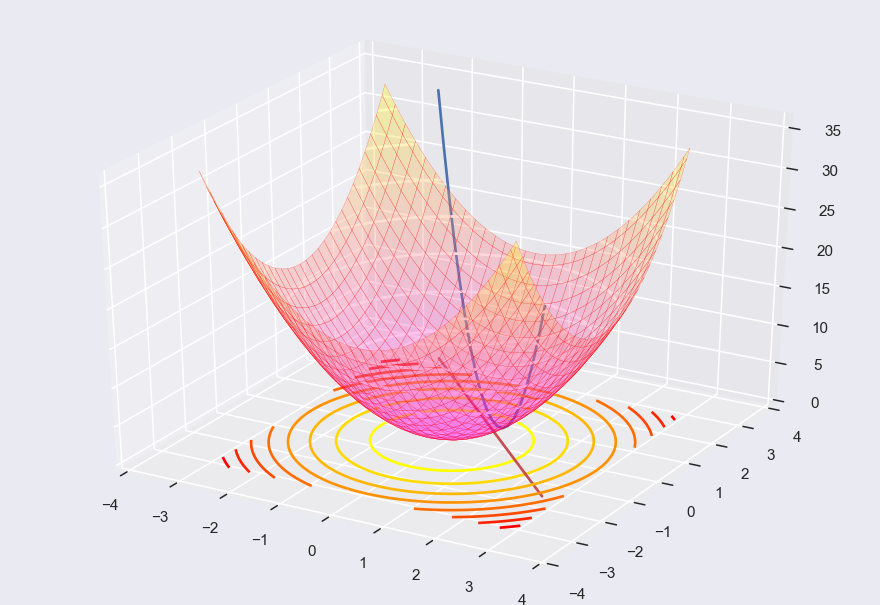

In [48]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib notebook

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)

#曲面
px,py=np.meshgrid(x,y)
pz = 2*px**2 + 2*py**2

#局面上に描く制約条件（曲線）
cx = np.arange(-2, 3, .25)     #描画域を超えないように
cy = 1-cx
cz = 2*cx*cx + 3*cy*cy           # surface

#曲面と平面の交線
X2 = 1-y                     # line
Z2 = 2*X2**2 + 3*y**2        # line

XX,ZZ = np.meshgrid(x, z)
YY = 1-XX


fig = plt.figure()
ax = Axes3D(fig)
ax.plot(cx, cy, cz)
ax.plot_surface(px, py, pz, rstride=2, cstride=2, cmap='spring', alpha=0.3, linewidth=0.1, edgecolors='r')
ax.contour(px, py, pz, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(px, py, pz, 10, lw=3, colors="w", linestyles="solid")
ax.plot(cx,cy,0)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

plt.show()